In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

from sklearn.model_selection import GridSearchCV


# Carregar dados da planilha com data augmentation
df_treinamento = pd.read_excel("dados_treinamento_aumentado.xlsx")
df_validacao = pd.read_excel("dados_validacao.xlsx")

In [2]:
y_treinamento = df_treinamento['Ploidia']
X_treinamento = df_treinamento.drop('Ploidia', axis=1)

# Definir as variáveis de entrada para validação
X_validacao = df_validacao.drop('Ploidia', axis=1)
y_validacao = df_validacao['Ploidia']

y_treinamento30 = df_treinamento['Ploidia']
X_treinamento30 = df_treinamento.drop('Ploidia', axis=1)

# y_treinamento_bin = (y_treinamento > 0).astype(int)
# y_validacao_bin = (y_validacao > 0).astype(int)

## Aplicação da Regressão Logística

Acurácia do modelo nos dados de validação: 0.5

Matriz de Confusão nos dados de validação:
[[4 5]
 [4 5]]

Relatório de Classificação nos dados de validação:
              precision    recall  f1-score   support

           0       0.50      0.44      0.47         9
           1       0.50      0.56      0.53         9

    accuracy                           0.50        18
   macro avg       0.50      0.50      0.50        18
weighted avg       0.50      0.50      0.50        18



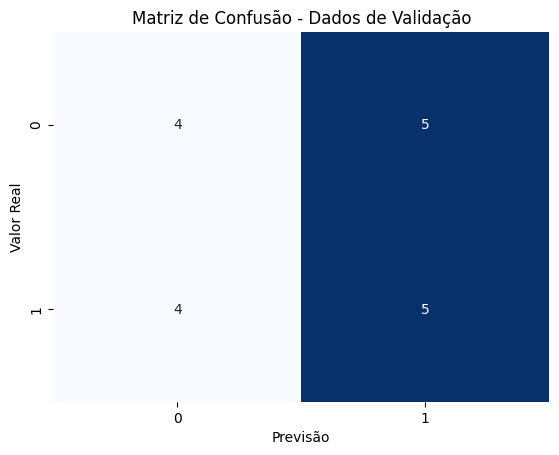


Coeficientes do modelo (para cada variável):
             Coeficiente
Idade           0.068192
Estágio         0.140125
Morfo           0.130399
Kidscore       -0.090150
Padrão          0.160945
t2             -0.042389
t3             -0.004731
t4              0.051375
t5              0.026558
t8             -0.014394
tSC            -0.016542
tSB             0.110288
tB              0.040900
cc2 (t3-t2)    -0.164834
cc3 (t5-t3)     0.148980
t5-t2           0.047834
s2 (t4-t3)      0.024377
s3 (t8-t5)      0.012799
tSC-t8         -0.248672
tB-tSB         -0.084222


In [8]:
# Inicializar o modelo de regressão logística
modelo = LogisticRegression()

# Treinar o modelo com os dados de treinamento
modelo.fit(X_treinamento, y_treinamento_bin)

# Fazer previsões com os dados de validação
y_pred_validacao = modelo.predict(X_validacao)

# Avaliar a performance do modelo usando os dados de validação
print("Acurácia do modelo nos dados de validação:", accuracy_score(y_validacao_bin, y_pred_validacao))
print("\nMatriz de Confusão nos dados de validação:")
print(confusion_matrix(y_validacao_bin, y_pred_validacao))
print("\nRelatório de Classificação nos dados de validação:")
print(classification_report(y_validacao_bin, y_pred_validacao,  zero_division=0))

# Gerar gráfico de confusão para os dados de validação
sns.heatmap(confusion_matrix(y_validacao_bin, y_pred_validacao), annot=True, fmt='d', cmap="Blues", cbar=False)
plt.title("Matriz de Confusão - Dados de Validação")
plt.xlabel("Previsão")
plt.ylabel("Valor Real")
plt.show()

# Exibir os coeficientes do modelo (para cada variável)
print("\nCoeficientes do modelo (para cada variável):")
coef_df = pd.DataFrame(modelo.coef_.T, index=X_treinamento.columns, columns=['Coeficiente'])
print(coef_df)

In [11]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_treinamento, y_treinamento_bin)
y_pred_rf = rf.predict(X_validacao)
print("Acurácia Random Forest:", accuracy_score(y_validacao_bin, y_pred_rf))


Acurácia Random Forest: 0.6111111111111112


In [19]:
# Exemplo: arredondar para o inteiro mais próximo para criar classes
y_treinamento_classe = y_treinamento.round().astype(int)
y_validacao_classe = y_validacao.round().astype(int)

rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search.fit(X_treinamento, y_treinamento_classe)

print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)

melhor_modelo = grid_search.best_estimator_
y_pred = melhor_modelo.predict(X_validacao)

print("Acurácia no conjunto de validação:", accuracy_score(y_validacao_classe, y_pred))
print("\nMatriz de Confusão:")
print(confusion_matrix(y_validacao_classe, y_pred))
print("\nRelatório de Classificação:")
print(classification_report(y_validacao_classe, y_pred, zero_division=0))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


/home/sabrina/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.0s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.3s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.3s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=False, max_depth=None, 

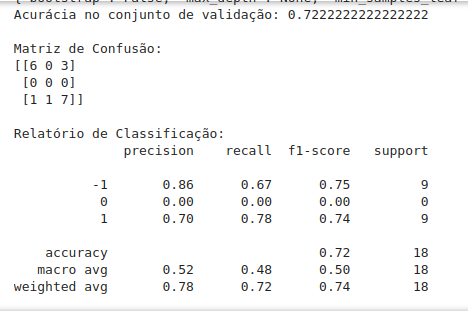

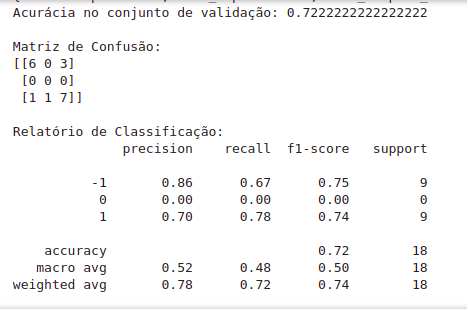

Esse resultado indica o desempenho do seu modelo Random Forest classificador após o treinamento e validação com dados que foram arredondados para se tornarem classes (por exemplo: -1, 0, 1)

- o modelo acertou cerca de 72,22% das classificações no conjunto de validação.
- A classe -1:
    - 6 vezes foi corretamente classificada como -1.
    - 3 vezes foi classificada erroneamente como 1.
- A classe 0:
    - Nenhum exemplo presente no conjunto de validação (support = 0). Isso é incomum — talvez seus dados tenham poucas amostras dessa classe.
- A classe 1:
    - 7 vezes foi corretamente classificada como 1.
    - 1 vez foi classificada como -1 e outra como 0.

Esses são os parâmetros ideais encontrados pelo GridSearchCV com base na acurácia:
- bootstrap: False → o modelo não fez amostragem com reposição.
- max_depth: None → as árvores cresceram até o máximo possível, sem limitar profundidade.
- min_samples_leaf: 1 → um nó folha pode conter uma única amostra.
- min_samples_split: 5 → um nó só é dividido se tiver pelo menos 5 amostras.
- n_estimators: 50 → 50 árvores na floresta.


In [23]:
## considerando o valor contínuo 

rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

grid_search.fit(X_treinamento, y_treinamento)

print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)

melhor_modelo = grid_search.best_estimator_
y_pred = melhor_modelo.predict(X_validacao)

mse = mean_squared_error(y_validacao, y_pred)
print(f"Mean Squared Error no conjunto de validação: {mse}")


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.6s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.7s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   1.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; to

Esses parâmetros foram os melhores encontrados durante a busca em grade (GridSearchCV), provavelmente com base em um erro como o neg_mean_squared_error.
- bootstrap: True → usa amostragem com reposição para criar os subconjuntos de treino de cada árvore.
- max_depth: None → sem limite de profundidade para as árvores (elas crescem até que os critérios de divisão parem).
- min_samples_leaf: 4 → cada nó folha deve ter no mínimo 4 amostras.
- min_samples_split: 10 → um nó só será dividido se tiver pelo menos 10 amostras.
- n_estimators: 100 → 100 árvores na floresta.
Esses parâmetros estão indicando um modelo mais conservador, o que ajuda a evitar overfitting.


In [26]:
r2 = r2_score(y_validacao, y_pred)
print("R²:", r2)

R²: 0.2805384021037144
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.5s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.5s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.5s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.5s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.8s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.7s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   2.1s
[CV] END bootstrap=F

Esse valor de R² = 0.28 significa que o seu modelo explica apenas 28% da variância dos dados no conjunto de validação.

O que é o R² (coeficiente de determinação)?
Mede o quanto o modelo está conseguindo "explicar" ou "prever" o comportamento dos dados.

Vai de:
- 1.0 → predição perfeita (explica 100% da variância dos dados)
- 0.0 → o modelo não explica nada além da média
- < 0.0 → o modelo está pior do que simplesmente chutar a média de y